In [56]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
%matplotlib inline

In [106]:
def linear_pred(theta, X):
    return X @ theta


def linear_regress(y, X):
    lr = 1e-3
    tolerance = 1e-5
    theta = np.random.randn(X.shape[1]).reshape((X.shape[1], 1))

    while True:
        error = linear_pred(theta, X) - y
        grad = 2. * np.mean((error * X), axis=0).reshape(theta.shape)
        new_theta = theta - lr * grad

        if np.sum(abs(new_theta - theta)) < tolerance:
            return new_theta

        theta = new_theta


def load_p3():
    p3 = loadmat("p3.mat")
    X_in, y_noisy, y_true = p3["X_in"], p3["y_noisy"], p3["y_true"]

    return X_in, y_noisy, y_true


def feature_mapping(X_in, mode):
    if mode == 2:
        X_in = np.log(X_in ** 2)

    ones = np.ones((X_in.shape[0], 1), dtype=X_in.dtype)
    return np.concatenate((ones, X_in), axis=1)


def exp_linreg(mode):
    X_in, y_noisy, y_true = load_p3()
    X_in = feature_mapping(X_in, mode)

    order = np.random.permutation(X_in.shape[0])
    X_in, y_noisy, y_true = X_in[order], y_noisy[order], y_true[order]

    X_train, X_test = X_in[:800], X_in[800:]
    y_train, y_test = y_noisy[:800], y_true[800:]
    
    theta = linear_regress(y_train, X_train)
    y_hat = linear_pred(theta, X_test)

    error = np.mean((y_hat - y_test) ** 2)
    print("MSE:", error)


In [107]:
print("feature_mapping #1:")
exp_linreg(1)

feature_mapping #1:
MSE: 1634.2056214193685


In [108]:
print("feature_mapping #2:")
exp_linreg(2)

feature_mapping #2:
MSE: 0.6208259614473229


In [109]:
def predict(theta, X):
    return np.where(X @ theta >= 0, 1.0, -1.0)


def perceptron_train(X, y):
    lr = 1e-3
    theta = np.random.randn(X.shape[1]).reshape((X.shape[1], 1))

    def check():
        return np.all(y == predict(theta, X))

    k = 0
    for epoch in range(1000000):
        order = np.random.permutation(X.shape[0])
        X, y = X[order], y[order]
        for X_i, y_i in zip(X, y):
            if check():
                return theta, k
            
            X_i = X_i.reshape(1, X.shape[1])
            y_i = y_i.reshape(1, y.shape[1])
            error = predict(theta, X_i) - y_i
            grad = np.mean((error * X_i), axis=0).reshape(theta.shape)
            theta = theta - lr * grad

            k += 1
    
    assert False


def perceptron_test(theta, X_test, y_test):
    y_hat = predict(theta, X_test)
    return np.sum(y_hat != y_test) / X_test.shape[0]

exp_p4a:
test_error: 0.0
k_a: 92
theta: [-0.16168263  0.15815078]
angle: 2.3672368301916404
margin: 5.1423667505631245


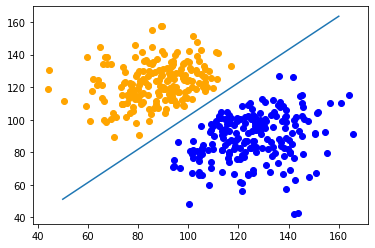

In [127]:
def exp_p4a():
    p4a = loadmat("p4a.mat")
    X, y = p4a["p4aX"], p4a["p4ay"]

    order = np.random.permutation(X.shape[0])
    X_train, y_train = X[order[:1600]], y[order[:1600]]
    X_test, y_test = X[order[1600:]], y[order[1600:]]

    theta, k = perceptron_train(X_train, y_train)
    test_error = perceptron_test(theta, X_test, y_test)
    print("exp_p4a:")
    print("test_error:", test_error)
    print("k_a:", k)
    print("theta:", theta.flatten())
    theta = theta.reshape(2)
    norm_theta = np.sqrt(np.sum(theta ** 2))
    angle = np.arccos(theta.dot(np.asarray([1., 0.])) / norm_theta)
    print("angle:", angle)

    
    pos_mask = y_test.flatten() >= 0
    neg_mask = ~pos_mask

    pos_dist = abs(X_test[pos_mask] @ theta.reshape((2, 1))) / norm_theta
    neg_dist = abs(X_test[neg_mask] @ theta.reshape((2, 1))) / norm_theta
    margin = min(min(pos_dist), min(neg_dist))
    print("margin:", margin.item())

    # draw
    plt.scatter(X_test[pos_mask, 0], X_test[pos_mask, 1], c="orange")
    plt.scatter(X_test[neg_mask, 0], X_test[neg_mask, 1], c="blue")
    x = np.linspace(50, 160)
    y = -theta[0] / theta[1] * x
    plt.plot(x, y)
    plt.show()


exp_p4a()

exp_p4b:
test_error: 0.005
k_b: 300
theta: [-0.87141214  0.87906911]
angle: 2.3518203101055923
margin: 0.34180948656919546


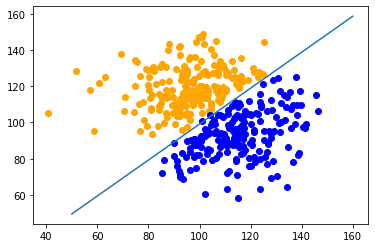

In [130]:
def exp_p4b():
    p4a = loadmat("p4b.mat")
    X, y = p4a["p4bX"], p4a["p4by"]

    order = np.random.permutation(X.shape[0])
    X_train, y_train = X[order[:1600]], y[order[:1600]]
    X_test, y_test = X[order[1600:]], y[order[1600:]]

    theta, k = perceptron_train(X_train, y_train)
    test_error = perceptron_test(theta, X_test, y_test)
    print("exp_p4b:")
    print("test_error:", test_error)
    print("k_b:", k)
    print("theta:", theta.flatten())
    theta = theta.reshape(2)
    norm_theta = np.sqrt(np.sum(theta ** 2))
    angle = np.arccos(theta.dot(np.asarray([1., 0.])) / norm_theta)
    print("angle:", angle)

    pos_mask = y_test.flatten() >= 0
    neg_mask = ~pos_mask

    pos_dist = abs(X_test[pos_mask] @ theta.reshape((2, 1))) / norm_theta
    neg_dist = abs(X_test[neg_mask] @ theta.reshape((2, 1))) / norm_theta
    margin = min(min(pos_dist), min(neg_dist))
    print("margin:", margin.item())

    # draw
    plt.scatter(X_test[pos_mask, 0], X_test[pos_mask, 1], c="orange")
    plt.scatter(X_test[neg_mask, 0], X_test[neg_mask, 1], c="blue")
    x = np.linspace(50, 160)
    y = -theta[0] / theta[1] * x
    plt.plot(x, y)
    plt.show()



exp_p4b()